In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
dataFrame=pd.read_excel("bisiklet_fiyatlari.xlsx")
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


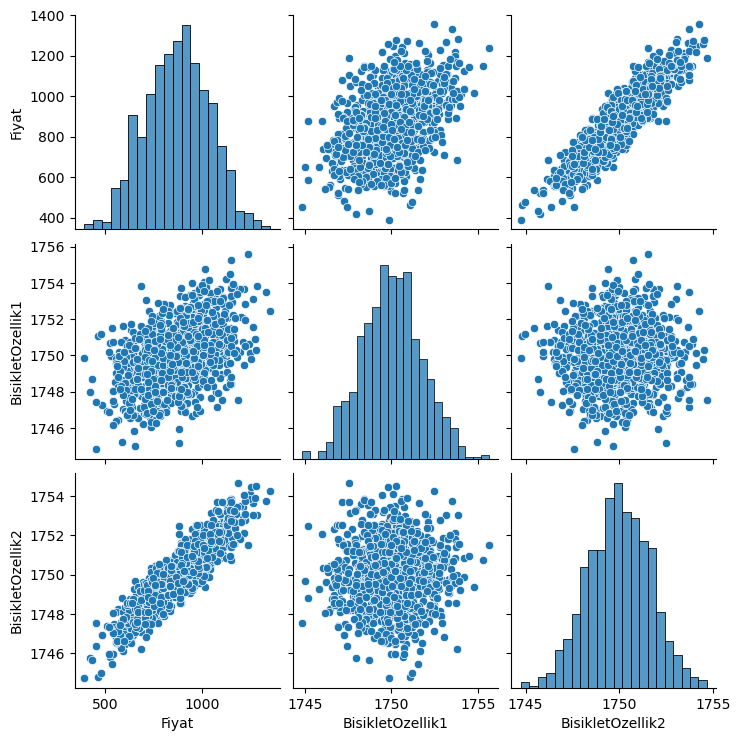

In [3]:
sbn.pairplot(dataFrame)

In [4]:
# veriyi test/train olarak ikiye bolme

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#train_test_split

In [7]:
#ozellik 1 ve ozellik2 yi bir dizıye fıyatı baska bır dızıye atamalıyız
#y=wx+b
#y=>label   x=> özellik(feature)
y=dataFrame["Fiyat"].values
x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)
x_train.shape


(670, 2)

In [8]:
x_test.shape

(330, 2)

In [9]:
y_train.shape

(670,)

In [10]:
y_test.shape

(330,)

In [11]:
#scaling (boyutlandırma )
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() # bundan bır obje olusturduk
#hangi veriyi kucultmek ıstıyorsak onu yazarız
#fit etmemiz gerekiyor scalerı ayarlamamız
scaler.fit(x_train)
x_train=scaler.transform(x_train)
#fit ettigimiz datayı alıp yenı x_train olarak esıtledık
x_test=scaler.transform(x_test)

In [12]:
x_train #0-1 arasına getırıldı tum degerlerı

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [13]:
import tensorflow as tf
from  tensorflow.keras.models import Sequential
#squential aslında bızım modelımızın sınıfı ve modelımızı bu sınıftan olusturuyoruz ve ondan sonra hangi katmanlarda calısacagız onu belırtıyoruz 
#katmanlarla calısmak için ise
from tensorflow.keras.layers import Dense

In [14]:
#modelımızı olusturuyoruz
model=Sequential()
#model içerisine katmanları ekleme
#katmanları ıfade etmek ıcın dense yı kullanırız
#kac tane hidden layer olmasını ıstersek o kadar tekrar ettırırız 
#noron sayısı 4
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

#cıktı olarak ise
model.add(Dense(1))
#compıle edıyor yanı calıstıraya hazır hale getırıyor
model.compile(optimizer="rmsprop",loss="mse")
#regresyon cızgısıne nasıl uydugunu gosteren hata bırımı mse 

In [15]:


#modelı calıstırmaya baslıyoruz(egitmeye)
#cok buyuk verı setımız varsa hepsını aynı anda vermek sıkıntı olusturabılır kacar kacar vercegımızı ayarlayabılırz
#epochs kac kere calıstıgını gosterır
#cok fazla olursa epochs overfitting olur 
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 783976.4375
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 774878.6250 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 783756.5625 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 776453.3125 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 794150.3125 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 814362.0625
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 767180.6875 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 791241.7500 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 790131.0625 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 805603.2500
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 831659.6875 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 796091.1250
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 784126.9375
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [16]:
loss=model.history.history["loss"]
#lossun degerlerını verıyor cızdırebılırız
#loss dıct halındeydı dızı halıne getırdık

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

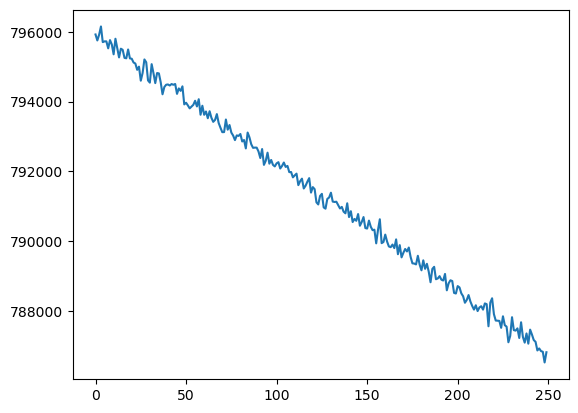

In [17]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [18]:
train_loss=model.evaluate(x_train,y_train,verbose=0)
#loss degerlerını verıyor

In [19]:
test_loss=model.evaluate(x_test,y_test,verbose=0)

In [20]:
train_loss

786687.375

In [21]:
test_loss

766706.0

In [22]:
testTahminleri=model.predict(x_test)
#predict tahmin


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [23]:
testTahminleri

array([[5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.256195],
       [5.25

In [24]:
tahminDf=pd.DataFrame(y_test,columns=["gercek y"])
tahminDf

,gercek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [26]:

testTahminleri=pd.Series(testTahminleri)
testTahminleri

ValueError: Data must be 1-dimensional, got ndarray of shape (330, 1) instead

In [27]:
tahminDf=pd.concat([tahminDf,testTahminleri],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [28]:
tahminDf

,gercek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [29]:
tahminDf.columns=["gercek y","tahmin y"]

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [30]:
tahminDf

,gercek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [ ]:
sbn.scatterplot(x ="gercek y",y ="tahmin y",data=tahminDf)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(tahminDf["gercek y"],tahminDf["tahmin y"])

In [ ]:
mean_squared_error(tahminDf["gercek y"],tahminDf["tahmin y"])

In [26]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [34]:
yeniBisikletOzellikleri=[[1751,1750]]

In [35]:
yeniBisikletOzellikleri=scaler.transform(yeniBisikletOzellikleri)

In [36]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[912.68823]], dtype=float32)

In [39]:
#modelı kayıt etme
from tensorflow.keras.models import load_model
model.save("bisiklet_modeli.h5")
sonradanCagirilanModel=load_model("bisiklet_modeli.h5")

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

## ARABA ANALİZ

In [31]:
dataFrame=pd.read_csv("D:/merc.csv")
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [32]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [33]:
dataFrame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 700x500 with 0 Axes>

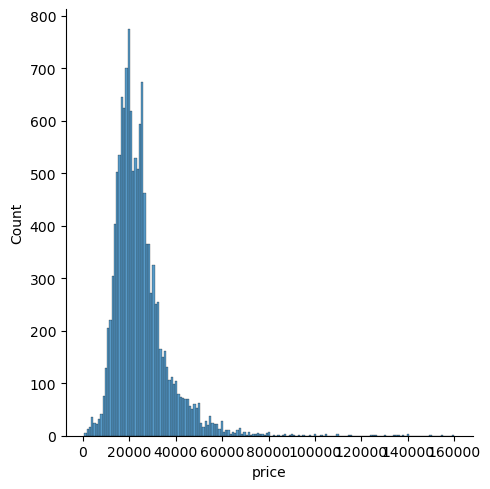

In [34]:
plt.figure(figsize=(7,5))
sbn.displot(dataFrame["price"])

<Axes: xlabel='year', ylabel='count'>

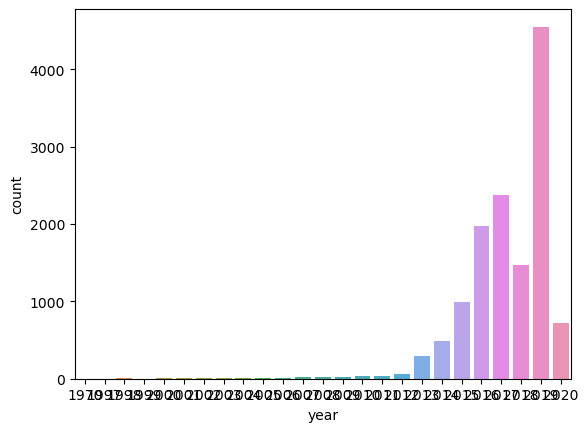

In [38]:
sbn.countplot(x="year",data=dataFrame)

<Axes: xlabel='mileage', ylabel='price'>

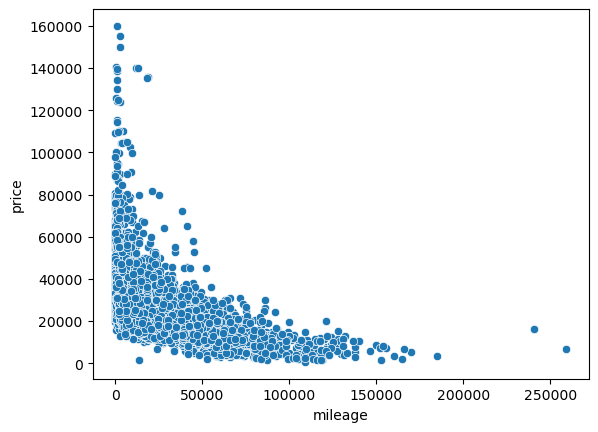

In [67]:
sbn.scatterplot(x="mileage",y="price", data=dataFrame)

In [69]:
dataFrame.sort_values("price" ,ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
...,...,...,...,...,...,...,...,...,...
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [70]:
dataFrame.sort_values("price" ,ascending=True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
...,...,...,...,...,...,...,...,...,...
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0


In [71]:
len(dataFrame)

13119

In [72]:
#verilerin yuzde99 unu alırsak bır sey kaybetmeyız model bozulmaz

In [73]:
len(dataFrame)*0.01

131.19

In [81]:
yuzdeDoksanDokuzDf=dataFrame.sort_values("price",ascending=False).iloc[131:]
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\hilal\AppData\Local\Temp\ipykernel_14036\1442147304.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(yuzdeDoksanDokuzDf["price"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

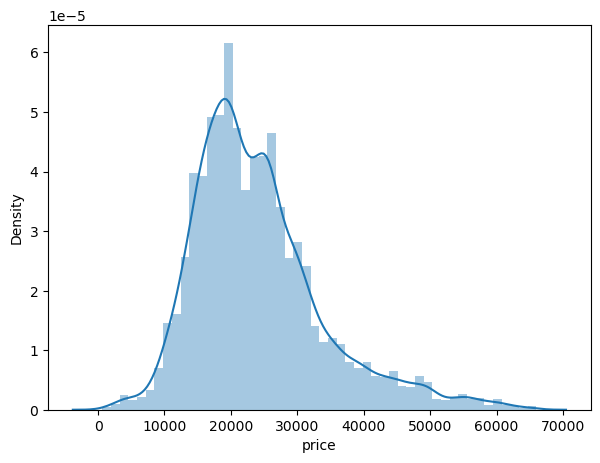

In [82]:
plt.figure(figsize=(7,5))
sbn.distplot(yuzdeDoksanDokuzDf["price"])

In [83]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [85]:
#dataFrame.groupby("year").mean()["price"]

TypeError: agg function failed [how->mean,dtype->object]

In [89]:
dataFrame[dataFrame.year !=1970].groupby("year").mean()["price"]

TypeError: agg function failed [how->mean,dtype->object]

In [90]:
dataFrame=yuzdeDoksanDokuzDf

In [91]:
dataFrame=dataFrame[dataFrame.year !=1970]

In [93]:
dataFrame.groupby("year").mean()["price"]

TypeError: agg function failed [how->mean,dtype->object]

In [94]:
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,GLS Class,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,C Class,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,C Class,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,C Class,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,S Class,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0


In [95]:
#numerık bır deger olmadıgı ıcın transmıssıon kolonunu kaldırmalıyız

In [97]:
dataFrame=dataFrame.drop("transmission",axis=1)

In [100]:
y=dataFrame["price"].values #numpy dızısıne cevırdık
x=dataFrame.drop("price",axis=1).values

In [101]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [102]:
x

array([[' GLS Class', 2019, 5076, ..., 150, 30.4, 3.0],
       [' C Class', 2020, 999, ..., 145, 28.0, 4.0],
       [' C Class', 2020, 3999, ..., 145, 28.0, 4.0],
       ...,
       [' SLK', 2000, 87000, ..., 265, 27.2, 3.2],
       [' A Class', 2010, 116126, ..., 145, 54.3, 2.0],
       [' A Class', 2003, 109090, ..., 235, 40.0, 1.4]], dtype=object)

In [104]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [109]:
len(x_train)

9090

In [110]:
len(x_test)

3897

In [117]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [119]:
scaler=MinMaxScaler()


In [135]:

# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

In [136]:
# x_train.shape

In [137]:
# model=Sequential()

In [138]:
# model.add(Dense(12,activation="relu"))
# model.add(Dense(12,activation="relu"))
# model.add(Dense(12,activation="relu"))
# model.add(Dense(12,activation="relu"))

# model.add(Dense(1))

# model.compile(optimizer="adam",loss="mse")

In [139]:
# model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

In [140]:
# kayipVerisi=pd.DataFrame(model.history.history)

In [141]:
# kayipVerisi.plot() # valudation_loss ile loss beraber mı hareket edıyor bakılır

In [142]:
#from sklearn.metrics import mean_squared_error,mean_absolute_error
#tahminDizisi=model.predict(x_test)
#mean_absolute_error(y_test,tahminDizisi)
#plt.scatterplot(y_test,tahminDizisi)
#plt.plot(y_test,y_test,"g-*")

In [144]:
#dataFrame.iloc[2]
#yeniArabaSeries=dataFrame.drop("price",axis=1).iloc[2]
#yeniArabaSeries=scaler.transform(yeniArabaSeries.values.reshape(-1,5))
#model.predict(yeniArabaSeries)


### sınıflandırma problemleri

In [145]:
import pandas as pd
import numpy as np

In [146]:
dataFrame=pd.read_excel("maliciousornot.xlsx")

In [147]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [149]:
dataFrame.info()
#ython'un pandas kütüphanesinde bulunan ve bir DataFrame'in yapısını ve bilgilerini özetleyen bir yöntemdir.
#Verilerinizin özelliklerini ve potansiyel sorunları anlamanıza yardımcı olacak önemli ayrıntılar sağlar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [150]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [151]:
#Korelasyon Nedir?
#, istatistikte iki rastgele değişken arasındaki doğrusal ilişkinin yönünü ve gücünü ölçen bir kavramdır. Daha basit bir ifadeyle, iki değişkenin birbiriyle nasıl ve ne kadar ilişkili olduğunu gösterir.

#Korelasyon Çeşitleri:

#Pozitif Korelasyon: Bir değişken arttıkça diğeri de artar.
#Negatif Korelasyon: Bir değişken arttıkça diğeri azalır.
#Sıfır Korelasyon: İki değişken arasında herhangi bir ilişki yoktur.

In [153]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [154]:
import matplotlib.pyplot as plt
import seaborn as sbn

<Axes: xlabel='Type', ylabel='count'>

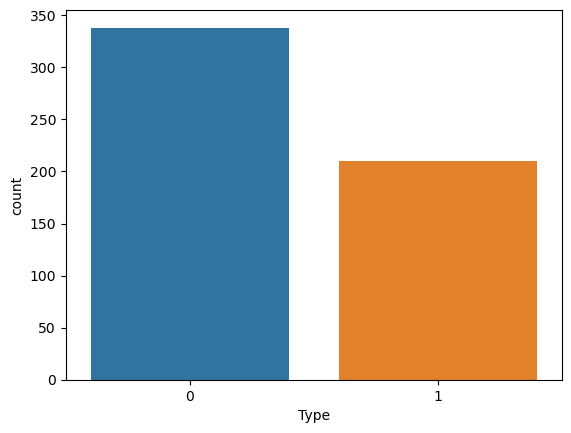

In [155]:
sbn.countplot(x="Type",data=dataFrame)

<Axes: >

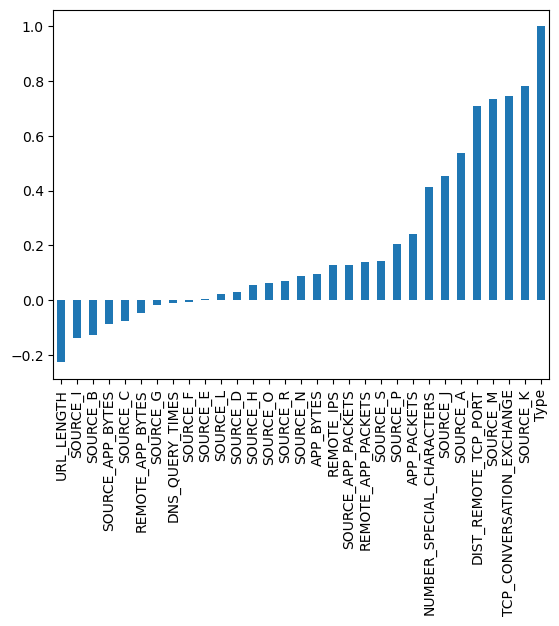

In [157]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [160]:
y=dataFrame["Type"].values
x=dataFrame.drop("Type", axis=1).values

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)
from sklearn.preprocessing import MinMaxScaler

In [167]:
scaler=MinMaxScaler()

In [168]:
scaler.fit(x_train)

MinMaxScaler()

In [169]:
x_train=scaler.transform(x_train)

In [171]:
x_test=scaler.transform(x_test)


In [176]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [177]:
x_train.shape

(383, 30)

In [178]:
model=Sequential()

In [181]:
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


In [183]:
model.fit(x=x_train,y=y_train, epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.6859 - val_loss: 0.6913
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6628 - val_loss: 0.6789
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6105 - val_loss: 0.6289
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5264 - val_loss: 0.6086
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4522 - val_loss: 0.5738
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4036 - val_loss: 0.5114
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3399 - val_loss: 0.4478
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3209 - val_loss: 0.4763
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2643 - val_loss: 0.4145
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1894 - val_loss: 0.2986
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1667 - val_loss: 0.2660
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [184]:
model.history.history

{'loss': [0.6833612322807312,
  0.6507317423820496,
  0.6006237864494324,
  0.5287671089172363,
  0.4539583921432495,
  0.39555779099464417,
  0.3496108055114746,
  0.3003297448158264,
  0.24374908208847046,
  0.18573813140392303,
  0.15436667203903198,
  0.1256326287984848,
  0.09965723752975464,
  0.08959165960550308,
  0.09105157107114792,
  0.09142493456602097,
  0.11281471699476242,
  0.07262539863586426,
  0.07106387615203857,
  0.06638801842927933,
  0.0626954659819603,
  0.0649152472615242,
  0.05717433989048004,
  0.049264732748270035,
  0.06398177146911621,
  0.05015068128705025,
  0.053227026015520096,
  0.045555099844932556,
  0.045475732535123825,
  0.04195499047636986,
  0.043651122599840164,
  0.03682488948106766,
  0.043396830558776855,
  0.0524953193962574,
  0.053798381239175797,
  0.04041501507163048,
  0.03524069860577583,
  0.05955084040760994,
  0.04764057323336601,
  0.0685248076915741,
  0.04675208032131195,
  0.03036285936832428,
  0.0484539158642292,
  0.03050

In [185]:
modelKaybi=pd.DataFrame(model.history.history)

<Axes: >

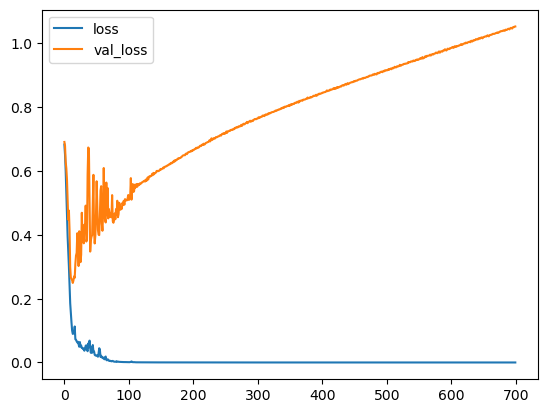

In [186]:
modelKaybi.plot()

In [187]:
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


In [188]:
earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [190]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7079 - val_loss: 0.6804
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6802 - val_loss: 0.6692
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6506 - val_loss: 0.6517
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6282 - val_loss: 0.6300
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5874 - val_loss: 0.5987
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5488 - val_loss: 0.5644
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5005 - val_loss: 0.5130
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4234 - val_loss: 0.4685
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4028 - val_loss: 0.4317
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3344 - val_loss: 0.3885
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2799 - val_loss: 0.3725
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [191]:
modelKaybi=pd.DataFrame(model.history.history)

<Axes: >

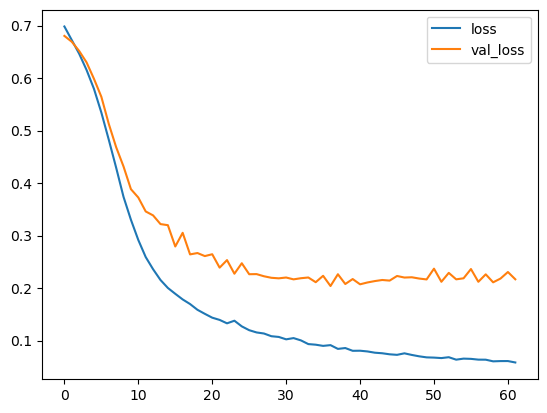

In [192]:
modelKaybi.plot()

In [194]:
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0,6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0,6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0,6))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


In [195]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.6963 - val_loss: 0.7027
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6814 - val_loss: 0.6971
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6774 - val_loss: 0.6882
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6624 - val_loss: 0.6745
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6372 - val_loss: 0.6574
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6002 - val_loss: 0.6204
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5603 - val_loss: 0.5815
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4962 - val_loss: 0.5391
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4296 - val_loss: 0.4880
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3733 - val_loss: 0.4208
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3135 - val_loss: 0.3971
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [196]:
kayipDf=pd.DataFrame(model.history.history)

<Axes: >

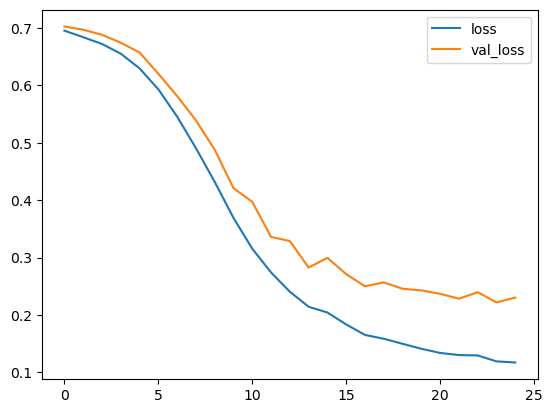

In [197]:
kayipDf.plot()

In [203]:
#tahminlerimiz=model.predict_classes(x_test)

In [204]:
#from sklearn.metrics import classification_report,confusion_matrix

In [205]:
#print(classification_report(y_test,tahminlerimiz))

In [206]:
#print(confusion_matrix(y_test,tahminlerimiz))